<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Access ACTRIS In-Situ data

In [2]:
# import packages
import pandas as pd
import numpy as np 
import requests
import json

import matplotlib.pyplot as plt

## Get metadata for instrument and country

After searching in the Metadata REST API, one chooses the metadata from certain parameters. 

In this example we get metadata from all ACTRIS In-Situ Data Centre unit data. Which is provider 14 IN-SITU

In [7]:
response = requests.get('https://prod-actris-md.nilu.no/Providers/14')
provider_14 = response.json()
provider_14 

[{'id': 14,
  'name': 'IN-SITU',
  'acronym': 'IN-SITU',
  'description': 'ACTRIS In situ data centre unit (In-Situ)',
  'created': '2020-06-29T07:20:45.2311600Z'}]

In [8]:
response = requests.get("https://prod-actris-md.nilu.no/Metadata/provider/14") 
metadata_archive = response.json() 
print("The in-situ metadata archive contains {} datasets".format(len(metadata_archive)))

The in-situ metadata archive contains 19403 datasets


In [9]:
metadata_archive

[{'md_metadata': {'id': 203110,
   'provider': {'name': 'IN-SITU',
    'atom': 'http://localhost:5009/providers/14'},
   'file_identifier': 'RTXS-U8P8.nc',
   'language': 'en',
   'hierarchy_level': 'dataset',
   'online_resource': {'linkage': 'http://ebas.nilu.no/'},
   'datestamp': '2024-06-13T22:00:00.0000000Z',
   'created': '2024-06-14T08:00:07.0000000Z',
   'contact': [{'first_name': 'Markus',
     'last_name': 'Fiebig',
     'organisation_name': 'NILU',
     'role_code': ['custodian'],
     'country_code': 'NO',
     'delivery_point': 'Instituttveien 18',
     'address_city': 'Kjeller',
     'administrative_area': 'Viken',
     'postal_code': 2007,
     'email': 'ebas@nilu.no',
     'position_name': 'Senior Scientist'}]},
  'md_identification': {'abstract': 'Ozone at Arkona. These measurements are gathered as a part of the following projects EMEP',
   'title': 'Ozone at Arkona',
   'date_type': 'creation',
   'contact': [{'first_name': 'Yong',
     'last_name': 'Lin',
     'orga

In [10]:
abs_list = []
for md in metadata_archive: 
    if md['md_content_information']['attribute_descriptions'][0] == 'aerosol particle light absorption coefficient': 
        abs_list.append(md)
abs_list

[{'md_metadata': {'id': 202626,
   'provider': {'name': 'IN-SITU',
    'atom': 'http://localhost:5009/providers/14'},
   'file_identifier': 'VCRD-73GB.nc',
   'language': 'en',
   'hierarchy_level': 'dataset',
   'online_resource': {'linkage': 'http://ebas.nilu.no/'},
   'datestamp': '2024-06-13T22:00:00.0000000Z',
   'created': '2024-06-14T07:46:43.0000000Z',
   'contact': [{'first_name': 'Markus',
     'last_name': 'Fiebig',
     'organisation_name': 'NILU',
     'role_code': ['custodian'],
     'country_code': 'NO',
     'delivery_point': 'Instituttveien 18',
     'address_city': 'Kjeller',
     'administrative_area': 'Viken',
     'postal_code': 2007,
     'email': 'ebas@nilu.no',
     'position_name': 'Senior Scientist'}]},
  'md_identification': {'abstract': 'Aerosol_absorption_coefficient at Summit. These measurements are gathered as a part of the following projects GAW-WDCA, NOAA-ESRL',
   'title': 'Aerosol_absorption_coefficient at Summit',
   'date_type': 'creation',
   'cont

Each dataset in the in-situ catalogue have the option to download or stream the file itself. 

The two protocols used are: 

**HTTP** which is direct download and gives you a phycical netCDF file on your computer. 

**OPeNDAP** which is streaming of data in binary form, no download needed. 

In [11]:
# Each file have
abs_list[0]['md_distribution_information']

[{'data_format': 'NETCDF',
  'version_data_format': '4',
  'dataset_url': 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/VC/RD/73/VCRD-73GB.nc',
  'protocol': 'OPeNDAP',
  'function': 'streaming',
  'restriction': {'set': False},
  'transfersize': 2905986.0},
 {'data_format': 'NETCDF',
  'version_data_format': '4',
  'dataset_url': 'https://thredds.nilu.no/thredds/fileServer/ebas_doi/VC/RD/73/VCRD-73GB.nc',
  'protocol': 'HTTP',
  'function': 'download',
  'restriction': {'set': False},
  'transfersize': 2905986.0}]

In this example we will use the OPeNDAP protocol

In [12]:
files_list = []
for md in abs_list:
    for i in range(len(md['md_distribution_information'])):
        if md['md_distribution_information'][i]['protocol'] == 'OPeNDAP':
            url = md['md_distribution_information'][i]['dataset_url']
            files_list.append(url)
files_list

['https://thredds.nilu.no/thredds/dodsC/ebas_doi/VC/RD/73/VCRD-73GB.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/XA/UX/8S/XAUX-8S7T.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/EQ/QJ/HN/EQQJ-HNFE.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/WG/NV/S9/WGNV-S92T.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/S7/GU/B2/S7GU-B2Q4.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/9B/W7/JE/9BW7-JEMR.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/BT/VX/4A/BTVX-4AVV.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/AW/V7/7H/AWV7-7H2U.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/WU/Y6/5E/WUY6-5E2W.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/3A/K7/Q8/3AK7-Q8RU.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/Q5/NN/G2/Q5NN-G2FB.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/BM/YT/K9/BMYT-K93K.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/3Q/9Z/RR/3Q9Z-RRBC.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/ZD

## Accessing data through THREDDS

THREDDS catalogue: https://thredds.nilu.no/thredds/catalog.html


### Using netCDF4 and opendap protokoll

In [13]:
import netCDF4 as nc

In [14]:
opendap_url = files_list[0]
opendap_url

'https://thredds.nilu.no/thredds/dodsC/ebas_doi/VC/RD/73/VCRD-73GB.nc'

In [15]:
opendap_url = 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/M4/BC/9P/M4BC-9P9F.nc'
dataset = nc.Dataset(opendap_url)
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    Conventions: CF-1.8, ACDD-1.3
    featureType: timeSeries
    title: Aerosol_absorption_coefficient at Ispra
    keywords: GAW-WDCA, pm10, EMEP, ACTRIS, IT0004R, aerosol_absorption_coefficient, Ispra
    id: M4BC-9P9F.nc
    naming_authority: EBAS
    project: ACTRIS, EMEP, GAW-WDCA
    acknowledgement: Data used in this <study/report/figure/etc.> were accessed from EBAS (https://ebas.nilu.no) hosted by NILU. Specifically, the use included data affiliated with the frameworks: ACTRIS, EMEP, GAW-WDCA. Request acknowledgement details from data originator
    doi: https://doi.org/10.48597/M4BC-9P9F
    license: https://creativecommons.org/licenses/by/4.0/
    citation: Putaud, J., Martins dos Santos, S., 2019, Aerosol_absorption_coefficient at Ispra, data hosted by EBAS at NILU, DOI: https://doi.org/10.48597/M4BC-9P9F
    summary: Aerosol_absorption_coefficient at Ispra. These measurements are

### Using xarray and opendap protokoll

In [16]:
import xarray as xr

In [17]:
ds = xr.open_dataset(opendap_url)
ds

<xarray.Dataset>
Dimensions:                                               (time: 8760,
                                                           tbnds: 2,
                                                           metadata_time: 1,
                                                           Location: 1,
                                                           pressure_qc_flags: 2,
                                                           temperature_qc_flags: 2,
                                                           Wavelength: 7,
                                                           aerosol_absorption_coefficient_amean_qc_flags: 1,
                                                           aerosol_absorption_coefficient_prec1587_qc_flags: 1,
                                                           aerosol_absorption_coefficient_perc8413_qc_flags: 1)
Coordinates:
  * time                                                  (time) datetime64[ns] ...
  * metadata_time                                         (metadata_time) datetime64[ns] ...
  * Location                                              (Location) |S64 b'i...
  * Wavelength                                            (Wavelength) float64 ...
Dimensions without coordinates: tbnds, pressure_qc_flags, temperature_qc_flags,
                                aerosol_absorption_coefficient_amean_qc_flags,
                                aerosol_absorption_coefficient_prec1587_qc_flags,
                                aerosol_absorption_coefficient_perc8413_qc_flags
Data variables: (12/17)
    time_bnds                                             (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                    (metadata_time, tbnds) datetime64[ns] ...
    pressure_qc                                           (Location, pressure_qc_flags, time) float64 ...
    pressure_ebasmetadata                                 (Location, metadata_time) |S64 ...
    temperature_qc                                        (Location, temperature_qc_flags, time) float64 ...
    temperature_ebasmetadata                              (Location, metadata_time) |S64 ...
    ...                                                    ...
    aerosol_absorption_coefficient_perc8413_ebasmetadata  (Wavelength, metadata_time) |S64 ...
    pressure                                              (Location, time) float64 ...
    temperature                                           (Location, time) float64 ...
    aerosol_absorption_coefficient_amean                  (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_prec1587               (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_perc8413               (Wavelength, time) float64 ...
Attributes: (12/110)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Aerosol_absorption_coeffic...
    keywords:                                      GAW-WDCA, pm10, EMEP, ACTR...
    id:                                            M4BC-9P9F.nc
    naming_authority:                              EBAS
    ...                                            ...
    geospatial_lat_units:                          degrees_north
    geospatial_lon_units:                          degrees_east
    comment:                                       {\n    "Data definition": ...
    standard_name_vocabulary:                      CF-1.7, ACDD-1.3
    history:                                       None
    creator_url:                                   ebas.nilu.no

## Plot data with xarray/matplotlib

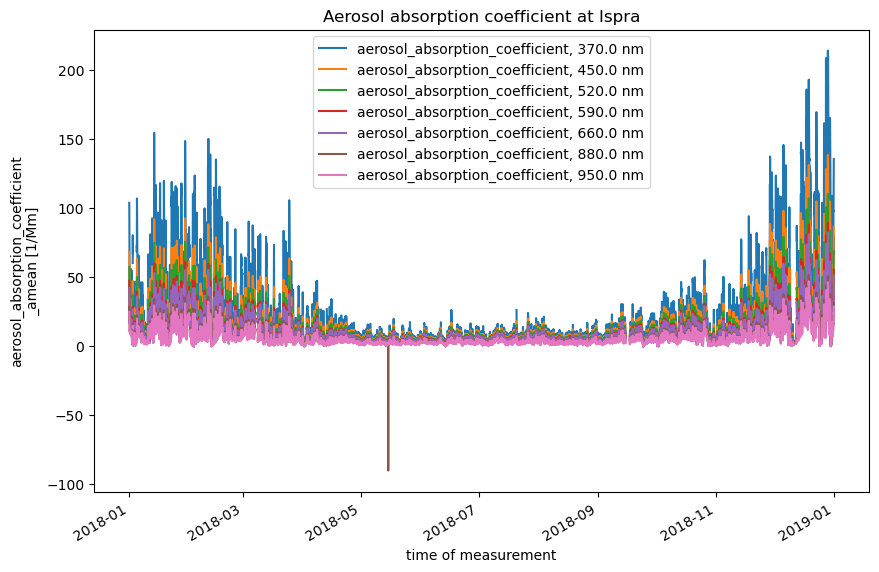

In [18]:
# This code runs if dataset above is dataset from filter absorption photometer instruments. 

ds_filter = ds.aerosol_absorption_coefficient_amean 

fig, ax = plt.subplots(figsize=(10,6))

for i in range(len(ds_filter.Wavelength.values)): 
    ds_filter.isel(Wavelength=i).plot(ax=ax, label="aerosol_absorption_coefficient, {} nm".format(ds_filter.Wavelength.values[i]))

plt.title("{} at {}".format(ds_filter.ebas_component.replace('_',' ').capitalize(), ds.ebas_station_name))
    
plt.legend()
plt.show()